# Assignment 2 - Supervised Machine Learning Fundamentals

## *Lorn Jaeger*
Netid: lj228812

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. When $n$ is large and $p$ is small a flexible model will perform **better**. Flexible models make less assumptions on the form of the response, and with more data the chance of overfitting decreases.
2. When $p$ is large and $n$ is small a flexible model will perform **worse**. Without much data, a flexible model is at risk of overfitting to noise instead of the target function.
3. When the relationship between the predictors and response is highly non-linear. a flexible model will perform **better**. Flexible models are more suited to complex functions.
4. When the variance of the error terms is extremely high a flexible model will perform **worse**. A flexible model might fit to the noise instead of the actual pattern.


---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**

(i) **Regression**. The dependent variable is continuous.  
(ii) **Inference**. We are finding factors correlated with CEO salary, not predicting an arbitrary CEO's salary.  
(iii) $n=500$, $p=3$

**(b)**

(i) **Classification**. The response variable is categorical.  
(ii) **Prediction**. We are trying to make a prediction as to the outcome of a product.  
(iii) $n=20$, $p=13$

**(c)**

(i) **Regression**. The dependent variable is continuous.  
(ii) **Prediction**. We are predicting the % change in the stock market.  
(iii) $n=52$, $p=3$



---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [29]:
import numpy as np
import pandas as pd

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

test_point = np.array([0, 0, 0])

distances = np.array([np.sqrt(np.sum((test_point - x)**2)) for x in X])

**ANSWER**:

**(a)**

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | Distance |
|------|-------|-------|-------|-------|----------|
| **1**| 0     | 3     | 0     | Red   | 3.00     |
| **2**| 2     | 0     | 0     | Red   | 2.00     |
| **3**| 0     | 1     | 3     | Red   | 3.16     |
| **4**| 0     | 1     | 2     | Blue  | 2.24     |
| **5**| -1    | 0     | 1     | Blue  | 1.41     |
| **6**| 1     | 1     | 1     | Red   | 1.73     |


**(b)** When $K=1$, $\hat{y}=Blue$ because K's closest neighbor is 5, which is blue.

**(c)** When $K=3$, $\hat{y}=Red$ because of K's closest three neighbors, two are red.

**(d)** If the Bayes decision boundary is highly nonlinear, then the best value of $K$ would be small. A larger $K$ smooths the decision boundary, which might not capture a highly non-linear boundary.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

In [25]:
# (a)

import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class Knn:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, x, y):
        self.X_train = x
        self.y_train = y

    def predict(self, x, k):
        dists = np.linalg.norm(self.X_train[:, np.newaxis] - x, axis=2)

        y_hat = []
        for dist in dists.T:
            k_neighbors = np.argsort(dist)[:k]
            k_neighbor_labels = self.y_train[k_neighbors]
            unique, counts = np.unique(k_neighbor_labels, return_counts=True)

            max_count = np.max(counts)
            candidates = unique[counts == max_count]
            if len(candidates) > 1:
                closest_label = k_neighbor_labels[np.isin(k_neighbor_labels, candidates)][0]
                y_hat.append(closest_label)
            else:
                y_hat.append(candidates[0])

        return np.array(y_hat)

def accuracy(y, y_hat):
    nvalues = len(y)
    return sum(y == y_hat) / nvalues

In [26]:
# (b)

X_train_low = pd.read_csv('A2_X_train_low.csv').values
y_train_low = pd.read_csv('A2_y_train_low.csv').values.ravel()
X_test_low = pd.read_csv('A2_X_test_low.csv').values
y_test_low = pd.read_csv('A2_y_test_low.csv').values.ravel()

X_train_high = pd.read_csv('A2_X_train_high.csv').values
y_train_high = pd.read_csv('A2_y_train_high.csv').values.ravel()
X_test_high = pd.read_csv('A2_X_test_high.csv').values
y_test_high = pd.read_csv('A2_y_test_high.csv').values.ravel()

In [28]:
# (c) and (d)

knn = Knn()

knn.fit(X_train_low, y_train_low)
start_time_low = time.time()
y_pred_low = knn.predict(X_test_low, k=5)
end_time_low = time.time()
accuracy_low = accuracy(y_test_low, y_pred_low)
time_low = end_time_low - start_time_low

knn.fit(X_train_high, y_train_high)
start_time_high = time.time()
y_pred_high = knn.predict(X_test_high, k=5)
end_time_high = time.time()
accuracy_high = accuracy(y_test_high, y_pred_high)
time_high = end_time_high - start_time_high

knn_sklearn = KNeighborsClassifier(n_neighbors=5)

start_time_low_sklearn = time.time()
knn_sklearn.fit(X_train_low, y_train_low)
y_pred_low_sklearn = knn_sklearn.predict(X_test_low)
end_time_low_sklearn = time.time()
accuracy_low_sklearn = accuracy_score(y_test_low, y_pred_low_sklearn)
time_low_sklearn = end_time_low_sklearn - start_time_low_sklearn

start_time_high_sklearn = time.time()
knn_sklearn.fit(X_train_high, y_train_high)
y_pred_high_sklearn = knn_sklearn.predict(X_test_high)
end_time_high_sklearn = time.time()
accuracy_high_sklearn = accuracy_score(y_test_high, y_pred_high_sklearn)
time_high_sklearn = end_time_high_sklearn - start_time_high_sklearn

print(f"{'Metric':<30} {'Custom KNN':<20} {'Scikit-Learn KNN':<20}")
print("-" * 75)
print(f"{'Low-dimensional Accuracy':<30} {accuracy_low:<20.4f} {accuracy_low_sklearn:<20.4f}")
print(f"{'Low-dimensional Time (s)':<30} {time_low:<20.4f} {time_low_sklearn:<20.4f}")
print("-" * 75)
print(f"{'High-dimensional Accuracy':<30} {accuracy_high:<20.4f} {accuracy_high_sklearn:<20.4f}")
print(f"{'High-dimensional Time (s)':<30} {time_high:<20.4f} {time_high_sklearn:<20.4f}")
print("==============================================================")

Metric                         Custom KNN           Scikit-Learn KNN    
---------------------------------------------------------------------------
Low-dimensional Accuracy       0.9249               0.9249              
Low-dimensional Time (s)       0.2058               0.1041              
---------------------------------------------------------------------------
High-dimensional Accuracy      0.9930               0.9930              
High-dimensional Time (s)      1.0967               0.1322              


#### (e)

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
newcmp = LinearSegmentedColormap.from_list("new", [(r/255, g/255, b/255), (r/255, g/255, b/255)], N=2)

NameError: name 'r' is not defined

**ANSWER**

---

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import random

# (a)
X, y = make_moons(n_samples=1000, noise=0.35, random_state=57)

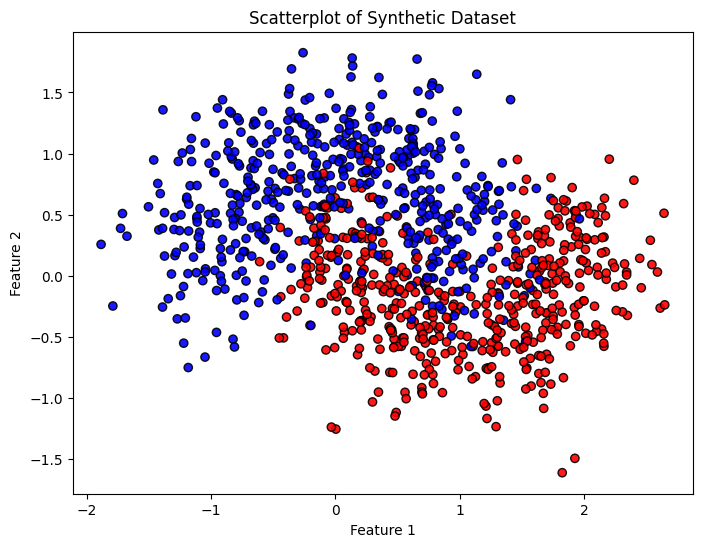

In [62]:
# (b)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.9, edgecolor='k')
plt.title('Scatterplot of Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [59]:
# (c)
random.seed(58)
datasets = [random.sample(range(1000), 100) for _ in range(3)]
k_values = [1, 25, 50]

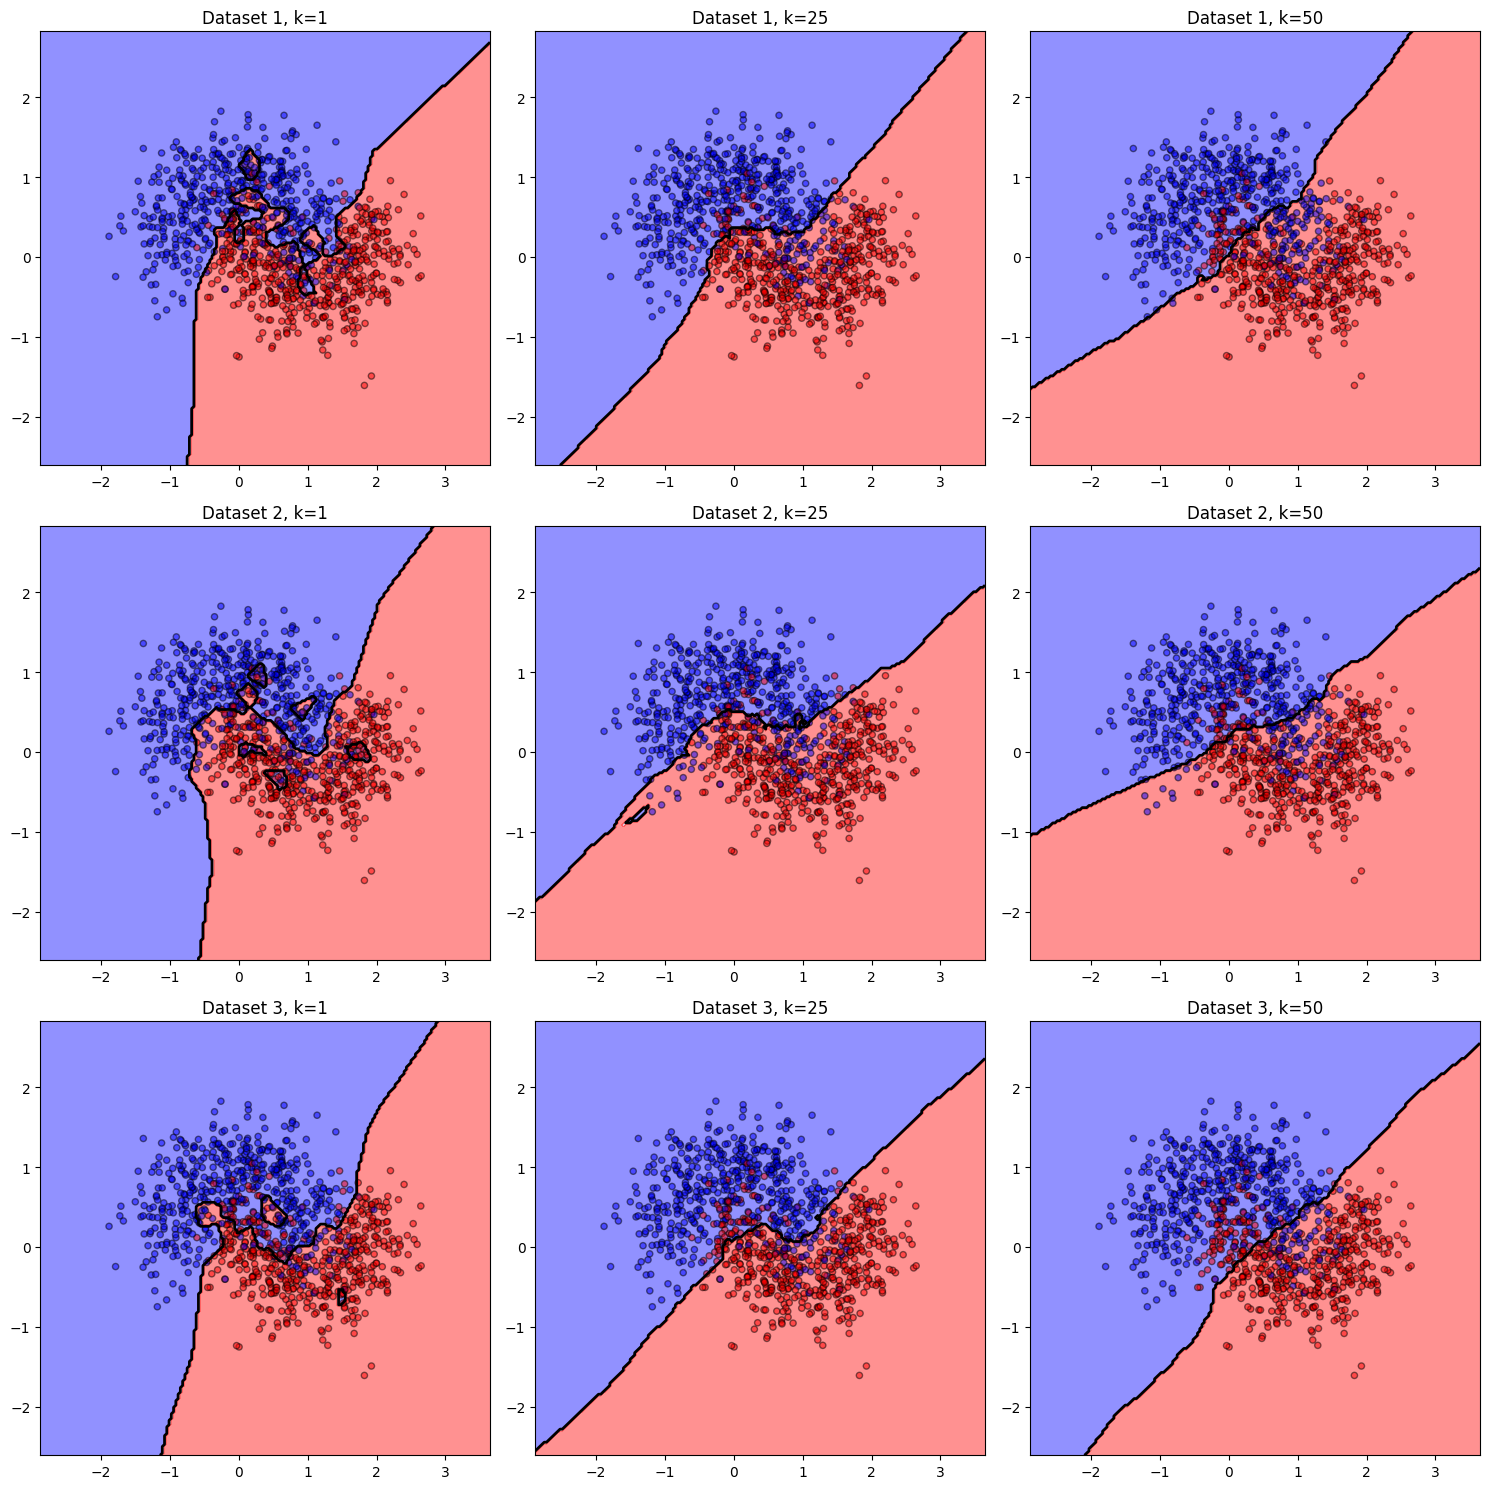

In [64]:
# (d)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

for i, subset in enumerate(datasets):
    X_subset = X[subset]
    y_subset = y[subset]
    for j, k in enumerate(k_values):
        clf = KNeighborsClassifier(n_neighbors=k).fit(X_subset, y_subset)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        axes[i, j].contourf(xx, yy, Z, alpha=0.5, cmap='bwr')
        axes[i, j].contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
        scatter = axes[i, j].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, alpha=0.5, cmap='bwr')
        axes[i, j].set_title(f"Dataset {i+1}, k={k}")

plt.tight_layout()
plt.show()

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

**ANSWER**

In [18]:
import pandas as pd

# Load training and test data
train_data = pd.read_csv('./A2_Q7_train.csv')
test_data = pd.read_csv('./A2_Q7_test.csv')

# Separate features (x) and target (y)
X_train = train_data[['x']].values
y_train = train_data['y'].values
X_test = test_data[['x']].values
y_test = test_data['y'].values


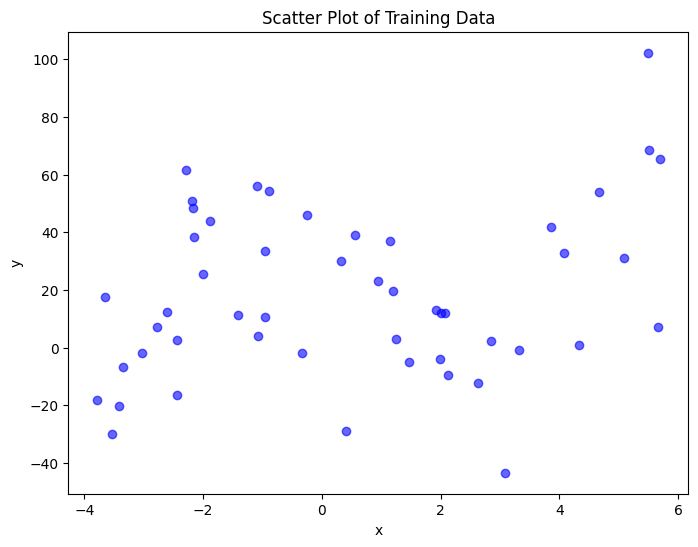

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Training Data')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the linear model
y_train_pred = linear_model.predict(X_train)

# Get coefficients and intercept
a0, a1 = linear_model.intercept_, linear_model.coef_[0]
print(f"Estimated model: y = {a0:.3f} + {a1:.3f} * x")

# Calculate R^2 and Mean Squared Error for the training data
r2_linear = r2_score(y_train, y_train_pred)
mse_linear = mean_squared_error(y_train, y_train_pred)

print(f"Linear Model - R^2: {r2_linear:.3f}, MSE: {mse_linear:.3f}")


Estimated model: y = 17.205 + 2.591 * x
Linear Model - R^2: 0.065, MSE: 791.417


In [21]:
import numpy as np

# Create new features for the transformation: x^2 and sin(x)
z1 = X_train
z2 = X_train ** 2
z3 = np.sin(X_train)

# Combine features into a single matrix
X_train_transformed = np.hstack([z1, z2, z3])

# Fit a multiple regression model
nonlinear_model = LinearRegression()
nonlinear_model.fit(X_train_transformed, y_train)

# Predict using the nonlinear model
y_train_pred_nonlinear = nonlinear_model.predict(X_train_transformed)

# Get coefficients and intercept
a0 = nonlinear_model.intercept_
a1, a2, a3 = nonlinear_model.coef_
print(f"Estimated model: y = {a0:.3f} + {a1:.3f} * x + {a2:.3f} * x^2 + {a3:.3f} * sin(x)")

# Calculate R^2 and Mean Squared Error for the training data
r2_nonlinear = r2_score(y_train, y_train_pred_nonlinear)
mse_nonlinear = mean_squared_error(y_train, y_train_pred_nonlinear)

print(f"Nonlinear Model - R^2: {r2_nonlinear:.3f}, MSE: {mse_nonlinear:.3f}")


Estimated model: y = 15.496 + 2.934 * x + -0.144 * x^2 + -19.666 * sin(x)
Nonlinear Model - R^2: 0.279, MSE: 610.155


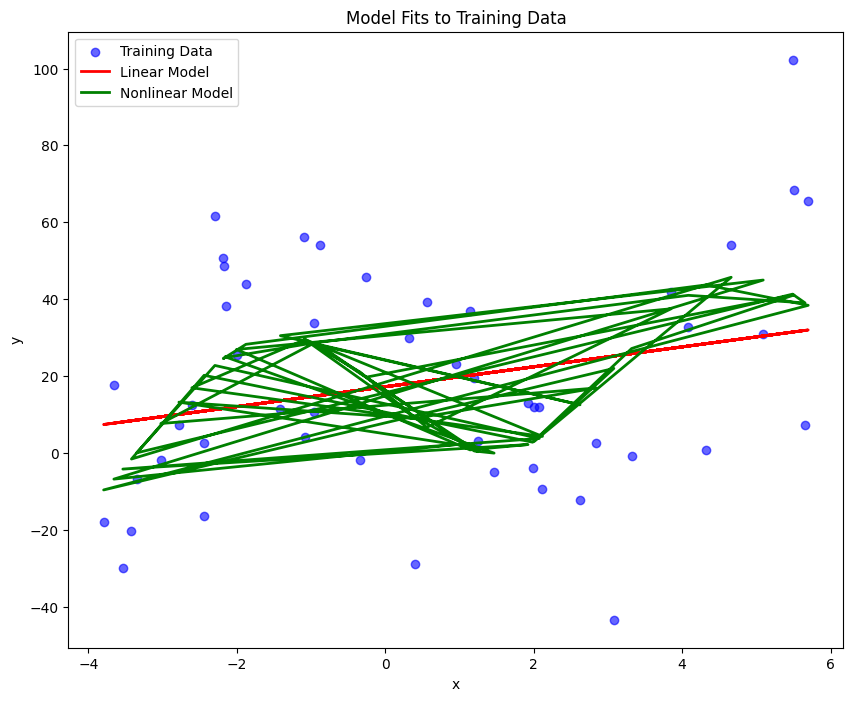

In [22]:
plt.figure(figsize=(10, 8))

# Scatter plot of training data
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')

# Plot linear model predictions
plt.plot(X_train, y_train_pred, color='red', label='Linear Model', linewidth=2)

# Plot nonlinear model predictions
plt.plot(X_train, y_train_pred_nonlinear, color='green', label='Nonlinear Model', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Fits to Training Data')
plt.legend()
plt.show()


In [23]:
# Predict using the linear model on test data
y_test_pred_linear = linear_model.predict(X_test)
r2_linear_test = r2_score(y_test, y_test_pred_linear)
mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Model (Test) - R^2: {r2_linear_test:.3f}, MSE: {mse_linear_test:.3f}")

# Apply the nonlinear transformations to the test data
X_test_transformed = np.hstack([X_test, X_test ** 2, np.sin(X_test)])

# Predict using the nonlinear model on test data
y_test_pred_nonlinear = nonlinear_model.predict(X_test_transformed)
r2_nonlinear_test = r2_score(y_test, y_test_pred_nonlinear)
mse_nonlinear_test = mean_squared_error(y_test, y_test_pred_nonlinear)

print(f"Nonlinear Model (Test) - R^2: {r2_nonlinear_test:.3f}, MSE: {mse_nonlinear_test:.3f}")


Linear Model (Test) - R^2: -0.133, MSE: 1116.663
Nonlinear Model (Test) - R^2: -0.201, MSE: 1183.850
